In [1]:
HF_URL = "hf://datasets/RussellBarkley/NucleusNet@main/Run100BL_bottom_left_ROI_100.tif"

# Optional: cache file bytes locally so repeated views are instant
# HF_URL = "simplecache::" + HF_URL


dtype: uint8 shape: (256, 256) min/max: 0.0 224.0


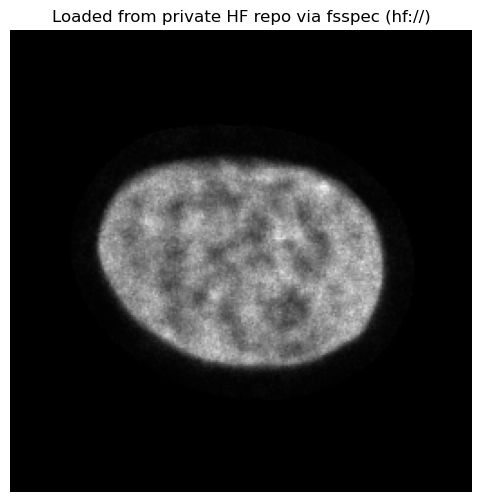

In [2]:
import fsspec
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
from tifffile import imread as tiff_imread
import os

token = os.environ.get("HUGGINGFACE_HUB_TOKEN", None)

# Read bytes from the private repo
with fsspec.open(HF_URL, "rb", token=token) as f:
    data = f.read()

# Decode TIFF from memory
img = tiff_imread(BytesIO(data))
if img.ndim == 3 and img.shape[-1] == 1:
    img = img[..., 0]

print("dtype:", img.dtype, "shape:", img.shape, "min/max:", float(np.min(img)), float(np.max(img)))

plt.figure(figsize=(6,6))
plt.imshow(img, cmap="gray")
plt.title("Loaded from private HF repo via fsspec (hf://)")
plt.axis("off")
plt.show()
